In [1]:
#!pip install tensorflow-text

In [2]:
#!pip install unstructured
#!pip install langchain

In [14]:
#pip install tensorflow

     -------------------------------------- 413.4/413.4 kB 2.6 MB/s eta 0:00:00
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
Note: you may need to restart the kernel to use 

In [15]:
#pip install tensorflow_hub

  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)
Note: you may need to restart the kernel to use updated packages.


In [16]:
#pip install torch

Note: you may need to restart the kernel to use updated packages.


In [17]:
#pip install xgboost

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [2]:
nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Aarti Tupe
[nltk_data]     Farkade\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Aarti Tupe
[nltk_data]     Farkade\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aarti Tupe
[nltk_data]     Farkade\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Aarti Tupe
[nltk_data]     Farkade\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))

In [10]:
df = pd.read_csv('IMDB Dataset.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,review,sentiment
0,Lipstick is another glossy movie failure.I am ...,negative
1,"More exciting than the Wesley Snipes film, and...",positive
2,"One of the best war films I have ever seen, if...",positive
3,"i expected something different:more passion,dr...",positive
4,This movie is mostly chase scenes and special ...,negative
...,...,...
49995,Pertty Kiran comes back to home after completi...,positive
49996,What a disappointment!<br /><br />This film se...,negative
49997,i thought this movie was really really great! ...,positive
49998,"Obviously, someone was looking at catching ont...",negative


In [11]:
class EDA():
    def get_length_dist(self,data):
        rev_len = [len(i) for i in data]
        pd.Series(rev_len).hist()
        plt.title('Number of types of commets')
        plt.xlabel('length')
        plt.ylabel('number')
        plt.show()
        print(pd.Series(rev_len).describe())
    def get_class_dist(self,df):
        df['sentiment'].replace({1:'positive',0:'negative'}).value_counts().plot(kind='bar',figsize=(7,4))
        plt.title('Number of types')
        plt.xlabel('Comment_type')
        plt.ylabel('number')
        plt.show()

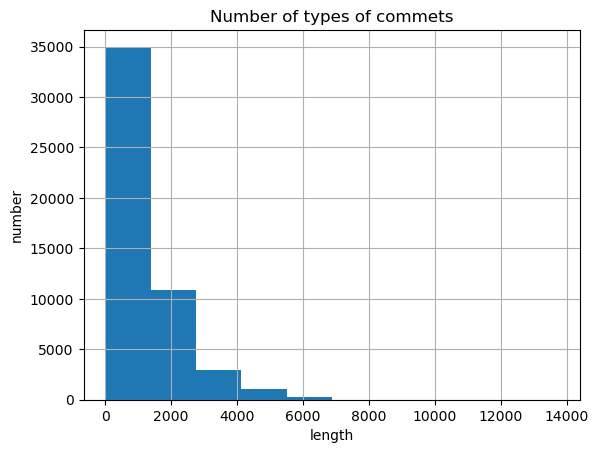

count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
dtype: float64


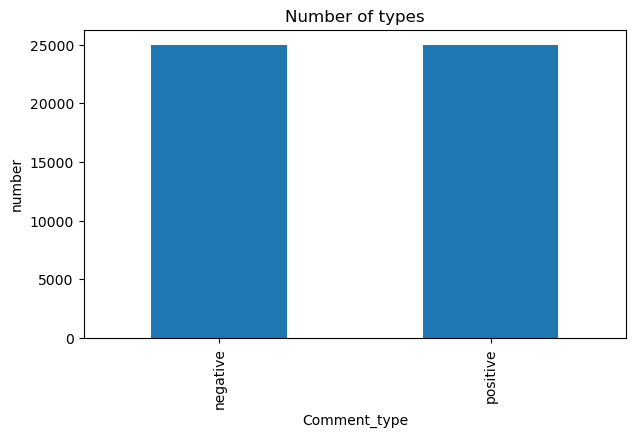

In [12]:
eda = EDA()
eda.get_length_dist(df['review'])
eda.get_class_dist(df)

In [13]:
def preprocess_text(text):
    # Remove HTML tags and strip whitespace
    text = re.sub(r'<[^>]*>', '', text)
    text = text.strip()
    # Remove noisy characters and extra spaces
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    # Lowercase text
    text = text.lower()
    # Tokenize text and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [14]:
df['review'] = df['review'].apply(preprocess_text)

In [15]:
df['review'].head(20)

0     lipstick another glossy movie failurei trying ...
1     exciting wesley snipes film better characters ...
2     one best war films ever seen best hard talk fi...
3     expected something differentmore passiondramaa...
4     movie mostly chase scenes special effects weak...
5     first movie one word wow probably one best mov...
6     print one greatest short stories ever written ...
7     really enjoyed girl fight something could watc...
8     film 1st avp film whole aliens predator franch...
9     movie brilliant srks acting amazing end incred...
10    mr bean bunch unfunny slapstick humour shallow...
11    ten times better wants super model bravo think...
12    show incredibly hilarious couldnt stop watchin...
13    30 years still remember movie worst ive ever s...
14    movie simple yet clever premise unemployed man...
15    first movie ive purchased almost certainly one...
16    see evil kane movie great storyline wasnt hide...
17    greatest movie gives us clue depth souls d

In [16]:
x = df['review']
y = df['sentiment']

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
Y = label_encode.fit_transform(df['sentiment'])
Y

array([0, 1, 1, ..., 1, 0, 0])

In [18]:
y

0        negative
1        positive
2        positive
3        positive
4        negative
           ...   
49995    positive
49996    negative
49997    positive
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

Note: 0 represent negative comments and 1 represent positive comments
Split the dataset into training and testing sets

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(x, Y, test_size=0.2, random_state=42)

Create a vocabulary

In [20]:
# Create a vocabulary
from collections import Counter
word_counts = Counter(' '.join(xtrain).split())

Display each word in the vocabulary along with its count

In [21]:
#for word, count in word_counts.items():
    #print(f"{word}: {count}")

In [22]:
#vocab = [word for word, count in word_counts.most_common()]
#vocab

# Classification with various classifiers
1. Linear SVM
2. Logistic Regression (LR)
3. Naive Bayes
4. XGBoost
5. Random Forest

In [23]:
#Import libraries
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

Initialize classifiers

In [24]:
svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=0)

In [25]:
def evaluate_model(model, xtest, ytest):
    # Make predictions using the model
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    # Calculate precision
    precision = precision_score(ytest, y_pred)
    # Calculate recall
    recall = recall_score(ytest, y_pred)
    # Calculate f1 score
    f1 = f1_score(ytest, y_pred)
    # Generate a classification report and confusion matrix
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm

In [26]:
# Define batch size
batch_size = 1000

# 1. TF-IDF

TF-IDF Vectorization

In [27]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [30]:
start = timer()
tfidf_vectorizer_xtrain = []
for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_tfidf = tfidf_vectorizer.fit_transform(batch_X_train)
    tfidf_vectorizer_xtrain.extend(batch_X_train_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start) 

Required time for embedding TFIDF with train data:-  7.092764199944213


Repeat the same process for test data

In [31]:
start = timer()
tfidf_vectorizer_xtest = []
for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_tfidf = tfidf_vectorizer.transform(batch_X_test)
    tfidf_vectorizer_xtest.extend(batch_X_test_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start) 

Required time for embedding TFIDF with train data:-  1.440506799845025


Fit classifiers

In [32]:
start = timer()
svm_tfidf = svm_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Linear SVM classifiers:- ', timer() - start) 
start = timer()
lr_tfidf = logistic_regression.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Logistic Regression classifiers:- ', timer() - start) 
start = timer()
nb_tfidf = nb_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training Naive Bayes classifiers:- ', timer() - start) 
start = timer()
xgboost_tfidf = xgboost_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training XGBoost classifiers:- ', timer() - start) 
start = timer()
rfc_tfidf = random_forest_classifier.fit(tfidf_vectorizer_xtrain, ytrain)
print('Required time for training all five classifiers:- ', timer() - start) 

Required time for training Linear SVM classifiers:-  11.11990849999711
Required time for training Logistic Regression classifiers:-  8.135130900191143
Required time for training Naive Bayes classifiers:-  6.066188000142574
Required time for training XGBoost classifiers:-  410.9858542000875
Required time for training all five classifiers:-  7.769585999893025


# Make predictions
Linear SVM

In [33]:
start = timer()
y_pred_svm, accuracy_svm, precision_svm, recall_svm, f1_svm, report_svm, confusion_matrix_svm = evaluate_model(svm_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for SVM prediction:- ', timer() - start) 

Required time for SVM prediction:-  0.733775099972263


Print actual vs. predicted results for LinearSVM

In [34]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_svm[:15]):
    print(f"Actual: {actual}, SVM Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, SVM Predicted: 0

Actual: 0, SVM Predicted: 0

Actual: 1, SVM Predicted: 0

Actual: 0, SVM Predicted: 0

Actual: 1, SVM Predicted: 0

Actual: 1, SVM Predicted: 1

Actual: 0, SVM Predicted: 1

Actual: 1, SVM Predicted: 1

Actual: 1, SVM Predicted: 1

Actual: 0, SVM Predicted: 0

Actual: 1, SVM Predicted: 1

Actual: 0, SVM Predicted: 1

Actual: 0, SVM Predicted: 0

Actual: 1, SVM Predicted: 0

Actual: 0, SVM Predicted: 1



In [35]:
print(f"LinearSVM Accuracy: {accuracy_svm:.2f}")
print(f"LinearSVM Precision: {precision_svm:.2f}")
print(f"LinearSVM Recall: {recall_svm:.2f}")
print(f"LinearSVM F1 score: {f1_svm:.2f}")
print("Classification Report:")
print(report_svm)
print("Confusion Matrix")
print(confusion_matrix_svm)

LinearSVM Accuracy: 0.68
LinearSVM Precision: 0.69
LinearSVM Recall: 0.68
LinearSVM F1 score: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      4957
           1       0.69      0.68      0.68      5043

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

Confusion Matrix
[[3404 1553]
 [1621 3422]]


# Logistic Regression

In [36]:
start = timer()
y_pred_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, report_lr, cm_lr = evaluate_model(lr_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for Logistic Regression prediction:- ', timer() - start) 

Required time for Logistic Regression prediction:-  0.23029590002261102


Print actual vs. predicted results for Logistic Regression

In [37]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_lr[:15]):
    print(f"Actual: {actual}, Logistic Regression Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 1

Actual: 0, Logistic Regression Predicted: 0

Actual: 1, Logistic Regression Predicted: 0

Actual: 0, Logistic Regression Predicted: 1



In [38]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1 score: {f1_lr:.2f}")
print("Classification Report:")
print(report_lr)
print("Confusion Matrix")
print(cm_lr)

Logistic Regression Accuracy: 0.70
Logistic Regression Precision: 0.70
Logistic Regression Recall: 0.70
Logistic Regression F1 score: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      4957
           1       0.70      0.70      0.70      5043

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

Confusion Matrix
[[3458 1499]
 [1529 3514]]


# Naive bayes

In [39]:
start = timer()
y_pred_nb, accuracy_nb, precision_nb, recall_nb, f1_nb, report_nb, cm_nb = evaluate_model(nb_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for Naive Bayes prediction:- ', timer() - start) 

Required time for Naive Bayes prediction:-  0.2805995000526309


Print actual vs. predicted results for Naive bayes

In [40]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_nb[:15]):
    print(f"Actual: {actual}, Naive bayes Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 1

Actual: 0, Naive bayes Predicted: 1

Actual: 1, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 1

Actual: 0, Naive bayes Predicted: 1

Actual: 0, Naive bayes Predicted: 0

Actual: 1, Naive bayes Predicted: 0

Actual: 0, Naive bayes Predicted: 0



In [41]:
print(f"Naive bayes Accuracy: {accuracy_nb:.2f}")
print(f"Naive bayes Precision: {precision_nb:.2f}")
print(f"Naive bayes Recall: {recall_nb:.2f}")
print(f"Naive bayes F1 score: {f1_nb:.2f}")
print("Classification Report:")
print(report_nb)
print("Confusion Matrix:")
print(cm_nb)

Naive bayes Accuracy: 0.69
Naive bayes Precision: 0.71
Naive bayes Recall: 0.66
Naive bayes F1 score: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      4957
           1       0.71      0.66      0.69      5043

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

Confusion Matrix:
[[3618 1339]
 [1716 3327]]


# XGBoost Classifier

In [42]:
start = timer()
y_pred_xgboost, accuracy_xgboost, precision_xgboost, recall_xgboost, f1_xgboost, report_xgboost, cm_xgboost = evaluate_model(xgboost_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for XGBoost classifier prediction:- ', timer() - start) 

Required time for XGBoost classifier prediction:-  1.5579485998023301


Print actual vs. predicted results for XGBoost classifier

In [43]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_xgboost[:15]):
    print(f"Actual: {actual}, XGBoost Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, XGBoost Predicted: 0

Actual: 0, XGBoost Predicted: 0

Actual: 1, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 0

Actual: 1, XGBoost Predicted: 0

Actual: 1, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 1

Actual: 1, XGBoost Predicted: 1

Actual: 1, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 0

Actual: 1, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 0

Actual: 0, XGBoost Predicted: 0

Actual: 1, XGBoost Predicted: 1

Actual: 0, XGBoost Predicted: 1



In [44]:
print(f"XGBoost Accuracy: {accuracy_xgboost:.2f}")
print(f"XGBoost Precision: {precision_xgboost:.2f}")
print(f"XGBoost Recall: {recall_xgboost:.2f}")
print(f"XGBoost F1 score: {f1_xgboost:.2f}")
print("Classification Report:")
print(report_xgboost)
print("Confusion Matrix:")
print(cm_xgboost)

XGBoost Accuracy: 0.68
XGBoost Precision: 0.68
XGBoost Recall: 0.68
XGBoost F1 score: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      4957
           1       0.68      0.68      0.68      5043

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

Confusion Matrix:
[[3362 1595]
 [1613 3430]]


# Random Forest Classifier

In [45]:
start = timer()
y_pred_rfc, accuracy_rfc, precision_rfc, recall_rfc, f1_rfc, report_rfc, cm_rfc = evaluate_model(rfc_tfidf, tfidf_vectorizer_xtest, ytest)
print('Required time for Random Forest classifier prediction:- ', timer() - start) 

Required time for Random Forest classifier prediction:-  0.19664019998162985


Print actual vs. predicted results for Random Forest classifier

In [46]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_rfc[:15]):
    print(f"Actual: {actual}, Random Forest Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, Random Forest Predicted: 0

Actual: 0, Random Forest Predicted: 0

Actual: 1, Random Forest Predicted: 0

Actual: 0, Random Forest Predicted: 1

Actual: 1, Random Forest Predicted: 1

Actual: 1, Random Forest Predicted: 1

Actual: 0, Random Forest Predicted: 1

Actual: 1, Random Forest Predicted: 0

Actual: 1, Random Forest Predicted: 0

Actual: 0, Random Forest Predicted: 0

Actual: 1, Random Forest Predicted: 1

Actual: 0, Random Forest Predicted: 0

Actual: 0, Random Forest Predicted: 0

Actual: 1, Random Forest Predicted: 0

Actual: 0, Random Forest Predicted: 1



In [47]:
print(f"Random Forest Accuracy: {accuracy_rfc:.2f}")
print(f"Random Forest Precision: {precision_rfc:.2f}")
print(f"Random Forest Recall: {recall_rfc:.2f}")
print(f"Random Forest F1 score: {f1_rfc:.2f}")
print("Classification Report:")
print(report_rfc)
print("Confusion Matrix:")
print(cm_rfc)

Random Forest Accuracy: 0.65
Random Forest Precision: 0.66
Random Forest Recall: 0.63
Random Forest F1 score: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65      4957
           1       0.66      0.63      0.64      5043

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.65     10000
weighted avg       0.65      0.65      0.65     10000

Confusion Matrix:
[[3330 1627]
 [1889 3154]]


# Display all five models accuracy

In [48]:
model_names = ['LinearSVM', 'LogisticRegression', 'NaiveBayes', 'XGBoost', 'RandomForest']
model_accuracies = [accuracy_svm, accuracy_lr, accuracy_nb, accuracy_xgboost, accuracy_rfc]

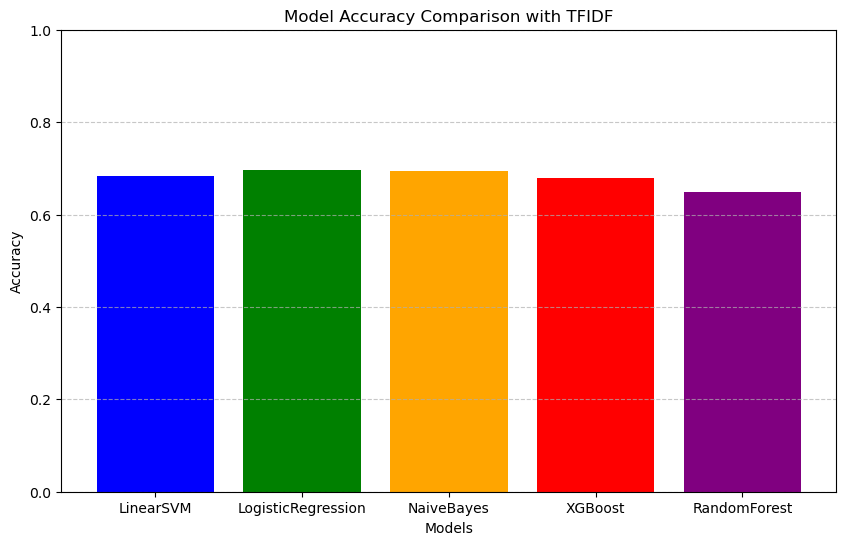

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with TFIDF")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Universal Sentence Encoder (USE)
1. Linear SVM
2. Logistic Regression
3. XGBoost classifier
4. Random Forest classifier


Load the Universal Sentence Encoder model, and embed this model

In [50]:
start = timer()
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
print('Required time for upload USE from tensorflow hub:- ', timer() - start) 

Required time for upload USE from tensorflow hub:-  208.03358459984884


In [51]:
xtrain_use = []
xtest_use = []

In [52]:
for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_use = np.array(embed(batch_X_train))
    xtrain_use.extend(batch_X_train_use)

In [53]:
for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_use = np.array(embed(batch_X_test))
    xtest_use.extend(batch_X_test_use)

Fit classifiers

In [54]:
start = timer()
svm_use = svm_classifier.fit(xtrain_use, ytrain)
print('Required time for training Linear SVM classifier:- ', timer() - start) 
start = timer()
lr_use = logistic_regression.fit(xtrain_use, ytrain)
print('Required time for training Logistic Regression:- ', timer() - start)  
start = timer()
xgboost_use = xgboost_classifier.fit(xtrain_use, ytrain)
print('Required time for training XGBoost classifier:- ', timer() - start) 
start = timer()
rfc_use = random_forest_classifier.fit(xtrain_use, ytrain)
print('Required time for training all Random Forest classifier:- ', timer() - start) 

Required time for training Linear SVM classifier:-  2.908329199999571
Required time for training Logistic Regression:-  2.7131124997977167
Required time for training XGBoost classifier:-  277.91041409992613
Required time for training all Random Forest classifier:-  11.214264699956402


# Make predictions
Linear SVM

In [55]:
y_pred_svm_use, accuracy_svm_use, precision_svm_use, recall_svm_use, f1_svm_use, report_svm_use, cm_svm_use = evaluate_model(svm_use, xtest_use, ytest)


Print actual vs. predicted results for LinearSVM with USE

In [56]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_svm_use[:15]):
    print(f"Actual: {actual}, SVM with USE embedding Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 1

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 0

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 0, SVM with USE embedding Predicted: 0

Actual: 1, SVM with USE embedding Predicted: 1

Actual: 0, SVM with USE embedding Predicted: 0



In [57]:
print(f"LinearSVM (USE) Accuracy: {accuracy_svm_use:.2f}")
print(f"LinearSVM (USE) Precision: {precision_svm_use:.2f}")
print(f"LinearSVM (USE) Recall: {recall_svm_use:.2f}")
print(f"LinearSVM (USE) F1 score: {f1_svm_use:.2f}")
print("Classification Report:")
print(report_svm_use)
print("Confusion Matrix")
print(cm_svm_use)

LinearSVM (USE) Accuracy: 0.83
LinearSVM (USE) Precision: 0.84
LinearSVM (USE) Recall: 0.83
LinearSVM (USE) F1 score: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4957
           1       0.84      0.83      0.83      5043

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Confusion Matrix
[[4149  808]
 [ 851 4192]]


# Logitic Regression

In [58]:
y_pred_lr_use, accuracy_lr_use, precision_lr_use, recall_lr_use, f1_lr_use, report_lr_use, cm_lr_use = evaluate_model(lr_use, xtest_use, ytest)


Print actual vs. predicted results for Logistic Regression with USE


In [59]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_lr_use[:15]):
    print(f"Actual: {actual}, Logistic Regression Predicted with USE: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 1

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 0, Logistic Regression Predicted with USE: 0

Actual: 1, Logistic Regression Predicted with USE: 1

Actual: 0, Logistic Regression Predicted with USE: 0



# XGBoost Classifier

In [60]:
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_use, xtest_use, ytest)


Print actual vs. predicted results for XGBooost classifier with USE


In [61]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_xgboost_use[:15]):
    print(f"Actual: {actual}, XGBoost with USE Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 1

Actual: 1, XGBoost with USE Predicted: 1

Actual: 1, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 0

Actual: 0, XGBoost with USE Predicted: 0

Actual: 0, XGBoost with USE Predicted: 0

Actual: 1, XGBoost with USE Predicted: 1

Actual: 0, XGBoost with USE Predicted: 0



In [62]:
print(f"XGBoost (USE) Accuracy: {accuracy_xgboost_use:.2f}")
print(f"XGBoost (USE) Precision: {precision_xgboost_use:.2f}")
print(f"XGBoost (USE) Recall: {recall_xgboost_use:.2f}")
print(f"XGBoost (USE) F1 score: {f1_xgboost_use:.2f}")
print("Classification Report:")
print(report_xgboost_use)
print("Confusion Matrix:")
print(cm_xgboost_use)

XGBoost (USE) Accuracy: 0.82
XGBoost (USE) Precision: 0.83
XGBoost (USE) Recall: 0.82
XGBoost (USE) F1 score: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4957
           1       0.83      0.82      0.82      5043

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Confusion Matrix:
[[4087  870]
 [ 912 4131]]


# Random Forest Classifier

In [63]:
y_pred_rfc_use, accuracy_rfc_use, precision_rfc_use, recall_rfc_use, f1_rfc_use, report_rfc_use, cm_rfc_use = evaluate_model(rfc_use, xtest_use, ytest)


Print actual vs. predicted results for Random Forest classifier with USE


In [64]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_rfc_use[:15]):
    print(f"Actual: {actual}, Random Forest with USE Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, Random Forest with USE Predicted: 1

Actual: 0, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 1

Actual: 0, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 1

Actual: 0, Random Forest with USE Predicted: 1

Actual: 1, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 0

Actual: 0, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 1

Actual: 0, Random Forest with USE Predicted: 0

Actual: 0, Random Forest with USE Predicted: 0

Actual: 1, Random Forest with USE Predicted: 1

Actual: 0, Random Forest with USE Predicted: 0



In [65]:
print(f"Random Forest (USE) Accuracy: {accuracy_rfc_use:.2f}")
print(f"Random Forest (USE) Precision: {precision_rfc_use:.2f}")
print(f"Random Forest (USE) Recall: {recall_rfc_use:.2f}")
print(f"Random Forest (USE) F1 score: {f1_rfc_use:.2f}")
print("Classification Report:")
print(report_rfc_use)
print("Confusion Matrix:")
print(cm_rfc_use)

Random Forest (USE) Accuracy: 0.78
Random Forest (USE) Precision: 0.80
Random Forest (USE) Recall: 0.75
Random Forest (USE) F1 score: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      4957
           1       0.80      0.75      0.77      5043

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Confusion Matrix:
[[3984  973]
 [1247 3796]]


# Display all four models accuracy
(--Note: Naive bayes (MultinomialNB) model not used with USE embedding because it not able to resolve the issue of negative values)

In [66]:
model_names = ['LinearSVM', 'LogisticRegression', 'XGBoost', 'RandomForest']
model_accuracies = [accuracy_svm_use, accuracy_lr_use, accuracy_xgboost_use, accuracy_rfc_use]

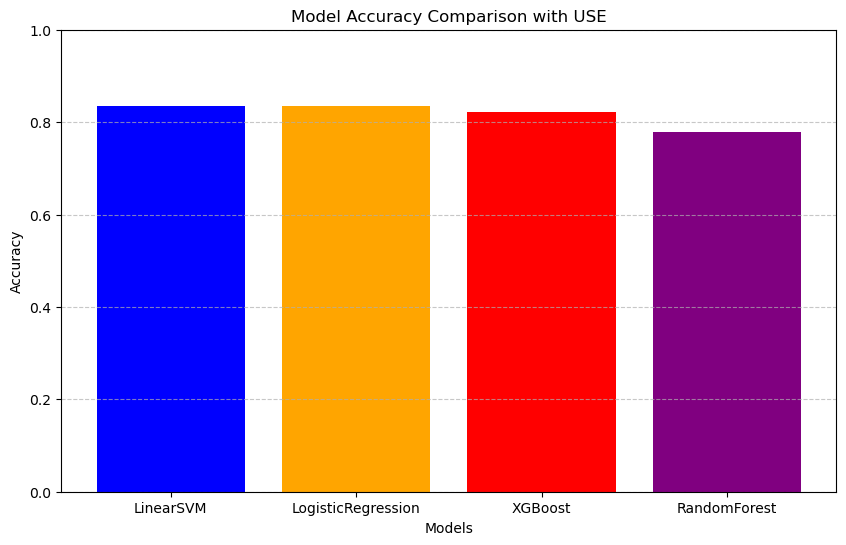

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'orange', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with USE")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# TF-IDF + Universal Sentence Encoder (USE)
1. Linear SVM
2. Logistic Regression
3. XGBoost classifier
4. Random Forest classifier

# Combine TF-IDF and Universal Sentence Encoder embeddings


In [68]:
xtrain_tfidf_use_combined = tf.concat([tfidf_vectorizer_xtrain, xtrain_use], axis=1)
xtest_tfidf_use_combined = tf.concat([tfidf_vectorizer_xtest, xtest_use], axis=1)

Fit classifiers

In [69]:
start = timer()
svm_tfidf_use = svm_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Linear SVM:- ', timer() - start) 
start = timer()
lr_tfidf_use = logistic_regression.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Logistic Regression:- ', timer() - start)
start = timer()
xgboost_tfidf_use = xgboost_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training XGBoost classifier:- ', timer() - start)
start = timer()
rfc_tfidf_use = random_forest_classifier.fit(xtrain_tfidf_use_combined, ytrain)
print('Required time for training Random Forest classifier:- ', timer() - start) 

Required time for training Linear SVM:-  5.443469000048935
Required time for training Logistic Regression:-  25.354179200017825
Required time for training XGBoost classifier:-  657.5391903999262
Required time for training Random Forest classifier:-  10.445348299806938


# Make predictions
Linear SVM

In [70]:
y_pred_svm_tfidf_use, accuracy_svm_tfidf_use, precision_svm_tfidf_use, recall_svm_tfidf_use, f1_svm_tfidf_use, report_svm_tfidf_use, cm_svm_tfidf_use = evaluate_model(svm_tfidf_use, xtest_tfidf_use_combined, ytest)


# Print actual vs. predicted results for Linear SVM with TFIDF + USE


In [71]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_svm_tfidf_use[:15]):
    print(f"Actual: {actual}, SVM with TFIDF+USE Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 1

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 0, SVM with TFIDF+USE Predicted: 0

Actual: 1, SVM with TFIDF+USE Predicted: 1

Actual: 0, SVM with TFIDF+USE Predicted: 0



In [72]:
print(f"LinearSVM (TFIDF+USE) Accuracy: {accuracy_svm_tfidf_use:.2f}")
print(f"LinearSVM (TFIDF+USE) Precision: {precision_svm_tfidf_use:.2f}")
print(f"LinearSVM (TFIDF+USE) Recall: {recall_svm_tfidf_use:.2f}")
print(f"LinearSVM (TFIDF+USE) F1 score: {f1_svm_tfidf_use:.2f}")
print("Classification Report:")
print(report_svm_tfidf_use)
print("Confusion Matrix")
print(cm_svm_tfidf_use)

LinearSVM (TFIDF+USE) Accuracy: 0.82
LinearSVM (TFIDF+USE) Precision: 0.82
LinearSVM (TFIDF+USE) Recall: 0.81
LinearSVM (TFIDF+USE) F1 score: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      4957
           1       0.82      0.81      0.82      5043

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Confusion Matrix
[[4080  877]
 [ 950 4093]]


# Logistic Regression

In [73]:
y_pred_lr_tfidf_use, accuracy_lr_tfidf_use, precision_lr_tfidf_use, recall_lr_tfidf_use, f1_lr_tfidf_use, report_lr_tfidf_use, cm_lr_tfidf_use = evaluate_model(lr_tfidf_use, xtest_tfidf_use_combined, ytest)


# Print actual vs. predicted results for Logistic Regression with TFIDF + USE


In [74]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_lr_tfidf_use[:15]):
    print(f"Actual: {actual}, LR with TFIDF+USE embedding Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 1

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 0, LR with TFIDF+USE embedding Predicted: 0

Actual: 1, LR with TFIDF+USE embedding Predicted: 1

Actual: 0, LR with TFIDF+USE embedding Predicted: 0



In [75]:
print(f"Logistic Regression (TFIDF+USE) Accuracy: {accuracy_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TFIDF+USE) Precision: {precision_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TFIDF+USE) Recall: {recall_lr_tfidf_use:.2f}")
print(f"Logistic Regression (TFIDF+USE) F1 score: {f1_lr_tfidf_use:.2f}")
print("Classification Report:")
print(report_lr_tfidf_use)
print("Confusion Matrix")
print(cm_lr_tfidf_use)

Logistic Regression (TFIDF+USE) Accuracy: 0.83
Logistic Regression (TFIDF+USE) Precision: 0.84
Logistic Regression (TFIDF+USE) Recall: 0.83
Logistic Regression (TFIDF+USE) F1 score: 0.83
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4957
           1       0.84      0.83      0.83      5043

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Confusion Matrix
[[4131  826]
 [ 850 4193]]


# XGBoost Classifier

In [76]:
y_pred_xgb_tfidf_use, accuracy_xgb_tfidf_use, precision_xgb_tfidf_use, recall_xgb_tfidf_use, f1_xgb_tfidf_use, report_xgb_tfidf_use, cm_xgb_tfidf_use = evaluate_model(xgboost_tfidf_use, xtest_tfidf_use_combined, ytest)


# Print actual vs. predicted results for XGBoost with TFIDF + USE


In [77]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_xgb_tfidf_use[:15]):
    print(f"Actual: {actual}, XGBoost with TFIDF+USE embedding Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0

Actual: 1, XGBoost with TFIDF+USE embedding Predicted: 1

Actual: 0, XGBoost with TFIDF+USE embedding Predicted: 0



In [78]:
print(f"XGBoost (TFIDF+USE) Accuracy: {accuracy_xgb_tfidf_use:.2f}")
print(f"XGBoost (TFIDF+USE) Precision: {precision_xgb_tfidf_use:.2f}")
print(f"XGBoost (TFIDF+USE) Recall: {recall_xgb_tfidf_use:.2f}")
print(f"XGBoost (TFIDF+USE) F1 score: {f1_xgb_tfidf_use:.2f}")
print("Classification Report:")
print(report_xgb_tfidf_use)
print("Confusion Matrix:")
print(cm_xgb_tfidf_use)

XGBoost (TFIDF+USE) Accuracy: 0.82
XGBoost (TFIDF+USE) Precision: 0.82
XGBoost (TFIDF+USE) Recall: 0.83
XGBoost (TFIDF+USE) F1 score: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4957
           1       0.82      0.83      0.82      5043

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

Confusion Matrix:
[[4042  915]
 [ 869 4174]]


# Random Forest classifier

In [79]:
y_pred_rfc_tfidf_use, accuracy_rfc_tfidf_use, precision_rfc_tfidf_use, recall_rfc_tfidf_use, f1_rfc_tfidf_use, report_rfc_tfidf_use, cm_rfc_tfidf_use = evaluate_model(rfc_tfidf_use, xtest_tfidf_use_combined, ytest)


# Print actual vs. predicted results for Random Forest with TFIDF + USE

In [80]:
print('0 = negative, 1 = positive')
for actual, predicted in zip(ytest[:15], y_pred_rfc_tfidf_use[:15]):
    print(f"Actual: {actual}, RFC with TFIDF+USE embedding Predicted: {predicted}")
    print()

0 = negative, 1 = positive
Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 1

Actual: 1, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 0

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0

Actual: 1, RFC with TFIDF+USE embedding Predicted: 1

Actual: 0, RFC with TFIDF+USE embedding Predicted: 0



In [81]:
print(f"Random Forest (TFIDF+USE) Accuracy: {accuracy_rfc_tfidf_use:.2f}")
print(f"Random Forest (TFIDF+USE) Precision: {precision_rfc_tfidf_use:.2f}")
print(f"Random Forest (TFIDF+USE) Recall: {recall_rfc_tfidf_use:.2f}")
print(f"Random Forest (TFIDF+USE) F1 score: {f1_rfc_tfidf_use:.2f}")
print("Classification Report:")
print(report_rfc_tfidf_use)
print("Confusion Matrix:")
print(cm_rfc_tfidf_use)

Random Forest (TFIDF+USE) Accuracy: 0.79
Random Forest (TFIDF+USE) Precision: 0.79
Random Forest (TFIDF+USE) Recall: 0.78
Random Forest (TFIDF+USE) F1 score: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      4957
           1       0.79      0.78      0.79      5043

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

Confusion Matrix:
[[3905 1052]
 [1090 3953]]


# Visualization

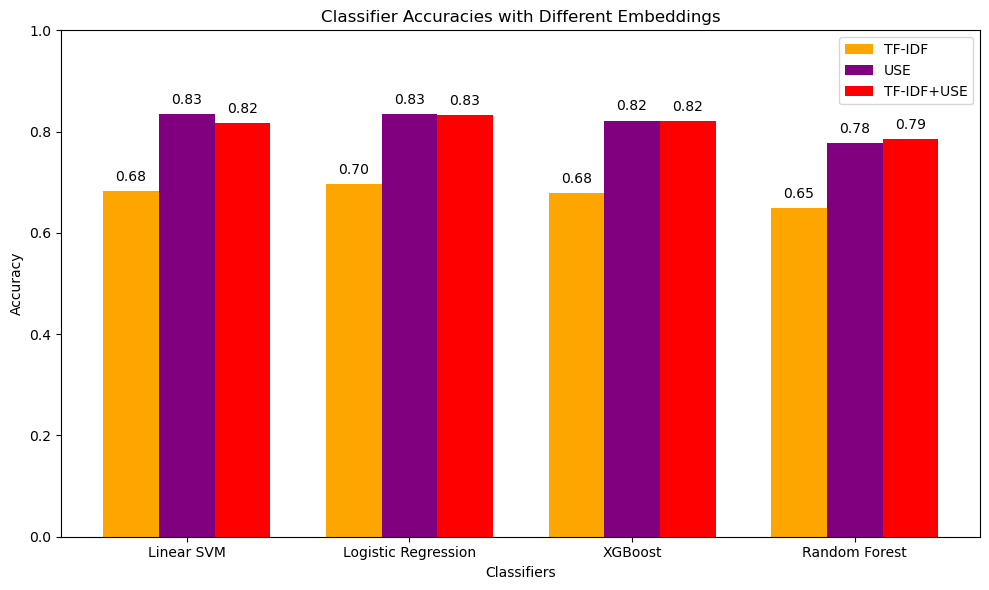

In [82]:
# Define the classifiers and their corresponding accuracies
classifiers = ["Linear SVM", "Logistic Regression", "XGBoost", "Random Forest"]
tfidf_accuracies = [accuracy_svm, accuracy_lr, accuracy_xgboost, accuracy_rfc]  # Replace with actual accuracy values
use_accuracies = [accuracy_svm_use, accuracy_lr_use, accuracy_xgboost_use, accuracy_rfc_use]  # Replace with actual accuracy values
tfidf_use_accuracies = [accuracy_svm_tfidf_use, accuracy_lr_tfidf_use, accuracy_xgb_tfidf_use, accuracy_rfc_tfidf_use]  # Replace with actual accuracy values

# Create an index for the x-axis
x = np.arange(len(classifiers))

# Set the width of the bars
bar_width = 0.25

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, tfidf_accuracies, bar_width, label='TF-IDF', color='orange')
plt.bar(x, use_accuracies, bar_width, label='USE', color='purple')
plt.bar(x + bar_width, tfidf_use_accuracies, bar_width, label='TF-IDF+USE', color='red')

# Set labels, title, and legend
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies with Different Embeddings')
plt.xticks(x, classifiers)
plt.ylim(0, 1.0)
plt.legend()

# Add accuracy values on top of the bars
for i in range(len(classifiers)):
    plt.text(x[i] - bar_width, tfidf_accuracies[i] + 0.02, f"{tfidf_accuracies[i]:.2f}", ha='center')
    plt.text(x[i], use_accuracies[i] + 0.02, f"{use_accuracies[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width, tfidf_use_accuracies[i] + 0.02, f"{tfidf_use_accuracies[i]:.2f}", ha='center')


# Display the plot
plt.tight_layout()
plt.show()

# Conclusion: If you see above visualization, as compared to TF-IDF embedding, USE as well as TF-IDF+USE embeddings works better for sentiment analysis on IMDB dataset with different classifiers